In [1]:
import numpy as np
from astropy.io import fits

from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.fft import fft

import platform, multiprocessing
from multiprocessing import Pool

import copy

import Simpler_Classifier

from importlib import reload 


[INFO]: No release version set. Setting default to DR17
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
[WARNING]: Passing field metadata as keyword arguments is deprecated. Use the explicit `metadata=...` argument instead. Additional metadata: {'location': 'view_args'} (RemovedInMarshmallow4Warning)
[WARNING]: The 'missing' argument to fields is deprecated. Use 'load_default' instead. (RemovedInMarshmallow4Warning)



my_module = reload(Simpler_Classifier) # reload of Simpler_Classifier without restart

In [2]:
HEADER_PATH = '/Users/runquanguan/Desktop/0823samples.fits'
#HEADER_PATH = '/Users/runquanguan/Documents/bicone_training_set.fits'
#HEADER_PATH = '/Users/runquanguan/Documents/dapall_excluded.fits'
#HEADER_PATH = '/Users/runquanguan/Desktop/DRPALL_NOT_DR7_value_0.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU_2']


In [3]:
if __name__ == '__main__':
    if platform.system() == "Darwin":
        multiprocessing.set_start_method('spawn')
        pool = multiprocessing.Pool(processes=10)
        results = []
        for result in tqdm(pool.imap_unordered(Simpler_Classifier.mask_integ_visual, plateifu), total = len(plateifu)):
            results.append(result)
        pool.close()
        pool.join() 


  0%|          | 0/94 [00:10<?, ?it/s]


BrainError: No URL Map found. Cannot make remote call

In [4]:
result_copy = copy.deepcopy(results)

In [5]:
clean = []
for i in result_copy:
    if i != None:
        clean.append(i)
len(clean)

0

In [6]:
store = []
for i in result_copy:
    if i != None:
        store.append(i)

In [7]:
miss_list = []
for data in list(plateifu):
    if data in clean:
        pass
    else:
        miss_list.append(data)

len(miss_list)

94

In [ ]:
miss_results = []
for i in tqdm(miss_list):
    result = Simpler_Classifier.mask_integ_visual(i)
    miss_results.append(result)

In [ ]:
clean_2 = []
for i in miss_results:
    if i != None:
        clean_2.append(i[0])
len(clean_2)

In [ ]:
for i in miss_results:
    if i != None:
        store.append(i)
len(store)

In [ ]:
miss_list_2 = []
for i in miss_list:
    if i in clean_2:
        pass
    else:
        miss_list_2.append(i)
len(miss_list_2)

In [ ]:
miss_results_2 = []
for i in tqdm(miss_list_2):
    result = Simpler_Classifier.mask_integ_visual(i)
    miss_results_2.append(result)

In [ ]:
for i in miss_results_2:
    store.append(i)

In [ ]:
len(store)

In [17]:
pla_re = []
value = []
r_re = []

for i in store:
    if i != None:
        pla_re.append(i[0])
        value.append(i[1])
        r_re.append(i[2])
        
    else:
        pass

        
#img_array = np.array(value)
#ima_res = img_array.imag

In [18]:
if len(store) == 156:

    c1 = fits.Column(name='plateifu', array=np.array(pla_re), format='20A')
    c2 = fits.Column(name='value', array=np.array(value), format='E')
    c3 = fits.Column(name='r_re', array=np.array(r_re), format='E')

    t = fits.BinTableHDU.from_columns([c1, c2, c3])
    t.writeto('sample_ring_peak_binary.fits')
else:
    pass

In [ ]:
len(store)

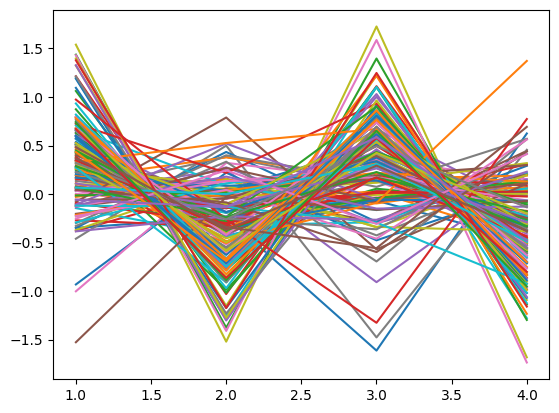

In [33]:
for i in store:
    x = [1,2,3,4]
    y = []
    for n in i[1][1]:
        nn = np.sign(n) * np.log10(abs(n))
        y.append(nn)
    plt.plot(x, y)
    
plt.show()

In [69]:
y = []
for i in store:
    a=i[1][1][0]/i[1][1][2]
    b=i[1][1][1]/i[1][1][3]
    y.append([i[0], abs(a-b)])
    
    
#x = np.linspace(0,156,156)
#y.sort()
y.sort()

TypeError: sort() takes no positional arguments

In [67]:
y

[['10215-9102', 0.38713367130037424],
 ['10216-12704', 0.5016638292277905],
 ['10222-1902', 0.3876945681165026],
 ['10502-12701', 0.020506045661716488],
 ['10507-1901', 0.6146117803622337],
 ['10512-6102', 0.008243336848142463],
 ['10513-1902', 1.5921162344502444],
 ['10517-3701', 0.02522641125836378],
 ['10518-3704', 0.3176449468520971],
 ['10519-1901', 0.8679426420985448],
 ['10520-3704', 0.6566100833609569],
 ['10520-6103', 68.33032058132181],
 ['11021-3702', 0.09262585374188115],
 ['11743-6102', 199.45975875078364],
 ['11746-9101', 0.5883973109158438],
 ['11750-3703', 0.2906854784154749],
 ['11826-6103', 0.08621729269568457],
 ['11827-6102', 0.2608187265808556],
 ['11832-1902', 0.10854585335223443],
 ['11833-12701', 0.6609848258738208],
 ['11834-9102', 0.020712381812431735],
 ['11863-6103', 0.4112755764400402],
 ['11863-9102', 0.3319940309460996],
 ['11945-1902', 12.813625016574075],
 ['11946-3701', 2.1173265919750217],
 ['11947-3704', 1.014175551676578],
 ['11949-3702', 0.05709928